In [325]:
# Necessary imports
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from datetime import date
from scipy import stats
from pandas import Series
from pandas import TimeGrouper
import datetime
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from matplotlib.pyplot import figure

In [243]:
# Init notebook mode
init_notebook_mode(connected=True) 

In [20]:
# Import data
test = pd.read_csv('bank.csv')
df = pd.read_csv('bank.csv')

In [21]:
# First row of the data
df.head(1).transpose()

,0
Institution Name,JPMorgan Chase Bank
Main Office,1
Branch Name,JPMorgan Chase Bank Main Office
Branch Number,0
Established Date,01/01/1824
Acquired Date,NaN
Street Address,1111 Polaris Parkway
City,Columbus
County,Delaware
State,OH


## 1. Inspecting the Data

In [22]:
# Dropping unimportant features
df.drop(['Main Office', 'Branch Number', 'Street Address', 'Zipcode'], axis=1, inplace = True)

In [23]:
# Updated row
df.head(1).transpose()

,0
Institution Name,JPMorgan Chase Bank
Branch Name,JPMorgan Chase Bank Main Office
Established Date,01/01/1824
Acquired Date,NaN
City,Columbus
County,Delaware
State,OH
Latitude,40.1445
Longitude,-82.9912
2010 Deposits,633131000


In [24]:
# Actual row and column count
df.shape

(4647, 16)

In [25]:
# Dropping rows with null values
df.dropna(how='any', inplace=True)

In [26]:
# Updated row and column count
df.shape

(3784, 16)

In [344]:
# Datatyps of each column
df.dtypes

Institution Name            object
Branch Name                 object
Established Date            object
City                        object
County                      object
State                       object
Latitude                   float64
Longitude                  float64
2010 Deposits                int64
2011 Deposits                int64
2012 Deposits                int64
2013 Deposits                int64
2014 Deposits                int64
2015 Deposits                int64
2016 Deposits                int64
Revenue                      int64
Acq Date            datetime64[ns]
Acq Year                     int64
Acq Month                    int64
dtype: object

In [28]:
# Descriptive Statistics of numeric columns
df.describe()

,Latitude,Longitude,2010 Deposits,2011 Deposits,2012 Deposits,2013 Deposits,2014 Deposits,2015 Deposits,2016 Deposits
count,3784.000000,3784.000000,3.784000e+03,3.784000e+03,3.784000e+03,3.784000e+03,3.784000e+03,3.784000e+03,3.784000e+03
mean,37.669354,-95.469941,1.048235e+05,1.195735e+05,1.346087e+05,1.484102e+05,1.700647e+05,1.698331e+05,1.742072e+05
std,5.406472,17.479718,9.417344e+05,1.286740e+06,1.608177e+06,1.768818e+06,2.247752e+06,1.874262e+06,1.631613e+06
min,0.000000,-124.421370,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,33.460763,-116.435655,2.856425e+04,3.046625e+04,3.369350e+04,3.655400e+04,3.971175e+04,4.366625e+04,4.805425e+04
50%,39.705055,-89.025590,4.952450e+04,5.181600e+04,5.769000e+04,6.230400e+04,6.799750e+04,7.366150e+04,8.124450e+04
75%,41.338387,-81.637325,9.067975e+04,9.479075e+04,1.024552e+05,1.104012e+05,1.187362e+05,1.274132e+05,1.408295e+05
max,48.801330,0.000000,4.509908e+07,6.263098e+07,8.196038e+07,8.517781e+07,9.832216e+07,8.456904e+07,6.904479e+07


# 2. Data Cleaning

In [29]:
# df.isnull().sum().sum()
df.isnull().values.any()

False

## 3. Number of Branches per state

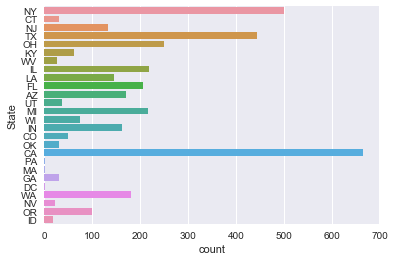

In [134]:
# Count plot for 'State'
_ = sns.countplot(y="State", data = df)

## 4. Mean and Median of number of branches 

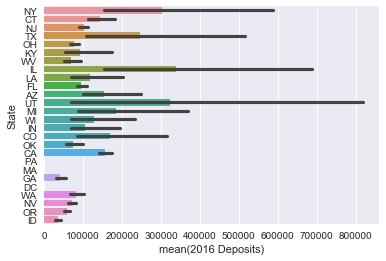

In [135]:
# Mean 
sns.barplot(y = "State", x = "2016 Deposits", data = df, estimator = np.mean)

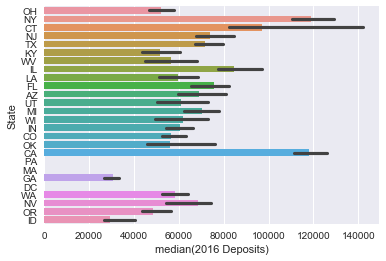

In [105]:
# Median
sns.barplot(y = "State", x = "2016 Deposits", data = df, estimator = np.median)

## 5. Time Series Analysis

In [30]:
# Creating a Revenue column for 2010 through 2016 deposits
rows = ['2010 Deposits', '2011 Deposits', '2012 Deposits', '2013 Deposits', '2014 Deposits', '2015 Deposits', '2016 Deposits']
df['Revenue'] = df[rows].sum(axis=1)

In [41]:
# Datatype of Acquaired date
type(df['Acquired Date'][1])

float

In [34]:
# Converting Acquired Date into date format
df['Acq Date'] = pd.to_datetime(df['Acquired Date'], errors='coerce')

# Extracting month and year of Acquired Date
df['Acquired Date'] = pd.to_datetime(df['Acquired Date'])
df['Acq Year'], df['Acq Month'] = df['Acquired Date'].dt.year, df['Acquired Date'].dt.month

# Dropping the original Acquired Date
df.drop(['Acquired Date'], axis=1, inplace=True)

# Remove NAT (null) dates
# abc = abc[pd.notnull(abc['Acq Date'])]

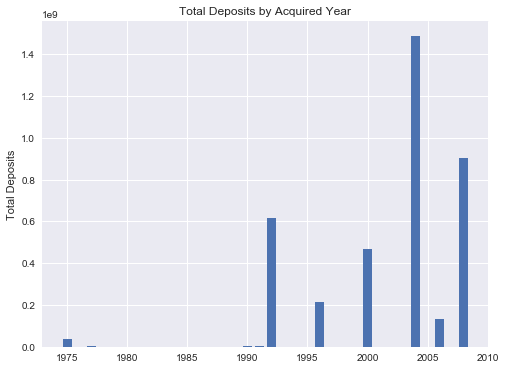

In [341]:
# Bar graph between deposits and year
fig = plt.bar(zz.index, zz['Revenue'])
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.ylabel('Year Acquired')
plt.ylabel('Total Deposits')
plt.title('Total Deposits by Acquired Year')

From the above bar graph we can notice that high overall deposits have come from the aqusitions in 2005

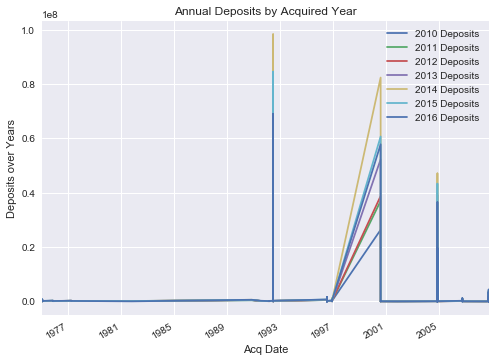

In [349]:
# Plot for deposits over the years
df.set_index('Acq Date').plot(y=rows, figsize=(8, 6), title = 'Annual Deposits by Acquired Year')
plt.ylabel('Deposits over Years')

From the above graph, we see that yearly deposits have increased over time between 2010 through 2016

In [358]:
# Choromap
data = dict(type='choropleth',
            colorscale = 'Viridis',
            locations = df['State'],
            z = df['2010 Deposits'],
            locationmode = 'USA-states',
#             text = df['text'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Millions USD"}
            ) 

In [359]:
layout = dict(title = 'Overall Deposits by State',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [360]:
choromap = go.Figure(data = [data],layout = layout)

In [361]:
iplot(choromap)

## 5. Number of branches acquaired by year

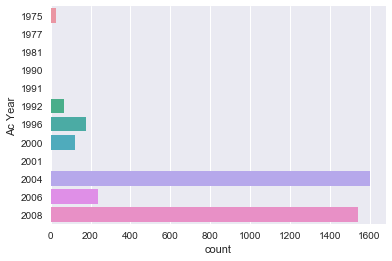

In [225]:
# Count plot for branches acquired by year
_ = sns.countplot(y="Ac Year",data=df)

It is evident from the above graph that highest number of acquisitions took place in 2004